## 1. Define the project objective

Before we start coding, we need to decide what we are testing.

We'll compare different ad campaigns within the xyz_campaign_id to see which one performed better.

**How do we measure a successful campaign?**

We'll compare the campaigns based on:

- Click-Through Rate (CTR): More clicks = better engagement.

- Conversion Rate (CR): More purchases = more success.

- Cost Per Conversion (CPCo): Lower cost = better efficiency.

**Hypothesis**

- Null Hypothesis (H₀): There is no difference in performance between xyz_campaign adds.

- lternative Hypothesis (Ha): One campaign performs significantly better than the other.

## 2. Load and Explore the Data

In [1]:
# import library for reading data
import pandas as pd

In [2]:
# read data into notebook
data = pd.read_csv('conversion_data.csv')

In [3]:
# inspect the first few rows
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# check for missing values
data.isnull().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


In [5]:
# check data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
# Check for duplicates
print(data.duplicated().sum())

0


In [7]:
# get basic statistics
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## 3. Compare Campaign Performance

In [8]:
# summary of xyz campaign stats
xyz_campaign_stats = data.groupby('xyz_campaign_id').agg(
    Impressions=('Impressions', 'sum'),
    Clicks=('Clicks', 'sum'),
    Spent=('Spent', 'sum'),
    Total_Conversions=('Total_Conversion', 'sum'),
    Approved_Conversions=('Approved_Conversion', 'sum')
).reset_index()

# display the summary
xyz_campaign_stats

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversions,Approved_Conversions
0,916,482925,113,149.710001,58,24
1,936,8128187,1984,2893.369999,537,183
2,1178,204823716,36068,55662.149959,2669,872


In [9]:
# let's add click though rates and conversion rates to the table for better interpretation
xyz_campaign_stats['CTR (%)'] = (xyz_campaign_stats['Clicks'] / xyz_campaign_stats['Impressions']) * 100
xyz_campaign_stats['CR (%)'] = (xyz_campaign_stats['Approved_Conversions'] / xyz_campaign_stats['Clicks']) * 100
xyz_campaign_stats["CPC"] = xyz_campaign_stats["Spent"] / xyz_campaign_stats["Total_Conversions"]

# Display the campaign summary
xyz_campaign_stats

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversions,Approved_Conversions,CTR (%),CR (%),CPC
0,916,482925,113,149.710001,58,24,0.023399,21.238938,2.581207
1,936,8128187,1984,2893.369999,537,183,0.024409,9.223790,5.388026
2,1178,204823716,36068,55662.149959,2669,872,0.017609,2.417656,20.855058


In [10]:
# select the needed columns for interpretation
xyz_campaign_stats[['xyz_campaign_id', 'CTR (%)', 'CR (%)', 'CPC']]

,xyz_campaign_id,CTR (%),CR (%),CPC
0,916,0.023399,21.238938,2.581207
1,936,0.024409,9.223790,5.388026
2,1178,0.017609,2.417656,20.855058


## Key Insights from the Data

1. Best Engagement (CTR)  is Campaign 936.

   It had 0.0244% CTR (Highest click-through rate).

   This means more people clicked on this campaign compared to others.

2. Best Conversion (CR) is Campaign 916

   It had 21.24% CR (Best at converting clicks into actual customers)

   This means it efficiently converted users into customers.

3. Most Cost-Effective (CPC) is Campaign 916

   It had $2.58 per conversion (Lowest cost per conversion)

   Meaning, it spent the least amount to get a conversion.


From this, we can deduce that Campaign 916 is the best overall campaign because:
- Highest Conversion Rate (21.24%). More people took action.
- Lowest Cost per Conversion ($2.58). Most cost-efficient.
- Decent CTR (0.0234%). Not the highest, but effective.



We know that we cannot stop here without proving that there is a statistical significance to back up our claims above.

Let's proceed with the actual test.

## 4. Prepare Data for A/B Testing

We will focus on two key groups for the test:

- Campaign 916 vs. Campaign 936

- Campaign 916 vs. Campaign 1178

In [11]:
# calculate non-conversions
xyz_campaign_stats['Non_Conversions'] = xyz_campaign_stats['Clicks'] - xyz_campaign_stats['Total_Conversions']

In [12]:
# display contingency table
contingency_table = xyz_campaign_stats[['Total_Conversions', 'Non_Conversions']]

contingency_table

,Total_Conversions,Non_Conversions
0,58,55
1,537,1447
2,2669,33399


In [13]:
# import library for performing chi-square test
from scipy.stats import chi2_contingency

In [14]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [15]:
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 1195.1607839746687
P-value: 2.979430548404177e-260
Degrees of Freedom: 2


## Interpretation of Results

1. Chi-Square Statistic (1195.1607839746687)

This high value indicates a huge difference between the observed and expected conversions.

2. P-Value (2.979430548404177e-260)

Our p-value (2.98 * 10⁻²⁶⁰) is extremely small, and very well below the significance level.

This means that the difference between campaigns is statistically significant. So, we can confidently reject the null hypothesis that all campaigns perform the same.

In [16]:
# convert expected values to a DataFrame for better readability
expected_data = pd.DataFrame(expected, columns=["Expected_Conversions", "Expected_Non_Conversions"])
expected_data.index = ["Campaign 916", "Campaign 936", "Campaign 1178"]

# display expected values
expected_data

,Expected_Conversions,Expected_Non_Conversions
Campaign 916,9.664143,103.335857
Campaign 936,169.678396,1814.321604
Campaign 1178,3084.657461,32983.342539


We can plot a graph of our expected conversions from this campaign vs the actual conversions.

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

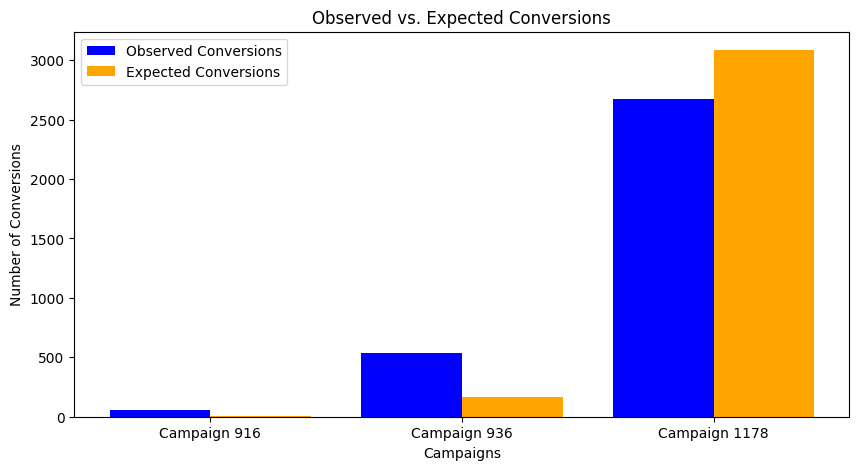

In [17]:
# create campaign names
campaigns = ["Campaign 916", "Campaign 936", "Campaign 1178"]

# observed conversions from the original data
observed_conversions = contingency_table["Total_Conversions"].values

# expected conversions from chi-square test
expected_conversions = expected_data["Expected_Conversions"].values

# create bar width and positions
bar_width = 0.4
x = np.arange(len(campaigns))

'''
To compare observed and expected conversions across campaigns, I used a grouped bar chart.
The bars are positioned using np.arange() to avoid overlap, ensuring clear visualization
'''

# creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, observed_conversions, bar_width, label="Observed Conversions", color="blue")
plt.bar(x + bar_width/2, expected_conversions, bar_width, label="Expected Conversions", color="orange")

# labels and title
plt.xlabel("Campaigns")
plt.ylabel("Number of Conversions")
plt.title("Observed vs. Expected Conversions")
plt.xticks(x, campaigns)
plt.legend();


## Conclusion from the A/B Test Analysis

The Observed Conversions vs. Expected Conversions comparison shows great differences between the campaigns.

1. Campaign 916: The observed (58) is substantially higher than expected (9.66), and this shows the campaign performed way better than one would expect.

2. Campaign 936: Observed (537) is significantly higher compared to expected (169.67), and the engagement and responsiveness are good here.

3. Campaign 1178: Noticed conversions (2669) fall below expectations (3084.66), so it appears that this campaign had less success statistically than would have been anticipated.

**Statistical Validation**

The Chi-Square test (p-value = 2.98 * 10⁻²⁶⁰) confirms differences between observed vs. expected conversions to be statistically significant, i.e., the campaigns were not equal by chance.

**Key Takeaways**

- Campaigns 916 and 936 exceeded expectations, making them top contenders for further scaling.

- Campaign 1178 underperformed against expectations, suggesting the need for optimization (e.g., better audience targeting, ad creative optimization).

- This analysis provides evidence-based suggestions for future ad campaign optimization and overall conversion rate optimization.


